# Exploring Ford GoBike Dataset
## by Farouk Bello

## Introduction
The dataset was provided for download on the project workspace and it is out individual rides made in a bike-sharing system covering the greater San Francisco Bay Area. Each trip record includes:

- Trip Duration (in seconds)
- Start Time and Date
- End Time and Date
- Start Station ID
- Start Station Name
- Start Station Latitude
- Start Station Longitude
- End Station ID
- End Station Name
- End Station Latitude
- End Station Longitude
- Bike ID
- User Type
- Bike share for all Trip

## Preliminary Wrangling

In [1]:
# Load in the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# Load the dataset into a pandas DataFrame
fordgobike = pd.read_csv('201902-fordgobike-tripdata.csv')
fordgobike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
0,52185,2019-02-28 17:32:10.1450,2019-03-01 08:01:55.9750,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
2,61854,2019-02-28 12:13:13.2180,2019-03-01 05:24:08.1460,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No
3,36490,2019-02-28 17:54:26.0100,2019-03-01 04:02:36.8420,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No
4,1585,2019-02-28 23:54:18.5490,2019-03-01 00:20:44.0740,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes


In [3]:
# Check the rows and columns in the Dataset
fordgobike.shape

(183412, 16)

In [4]:
# Let's get a view of the dataset
fordgobike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [5]:
# Inspecting the individual data within member_gender column
fordgobike['member_gender'].value_counts()

Male      130651
Female     40844
Other       3652
Name: member_gender, dtype: int64

In [6]:
# Inspecting unique values within the member_birth_year
fordgobike['member_birth_year'].unique()

array([ 1984.,    nan,  1972.,  1989.,  1974.,  1959.,  1983.,  1988.,
        1992.,  1996.,  1993.,  1990.,  1981.,  1975.,  1978.,  1991.,
        1997.,  1986.,  2000.,  1982.,  1995.,  1980.,  1973.,  1985.,
        1971.,  1979.,  1967.,  1998.,  1994.,  1977.,  1999.,  1987.,
        1969.,  1963.,  1976.,  1964.,  1965.,  1961.,  1968.,  1966.,
        1962.,  1954.,  1958.,  1960.,  1970.,  1956.,  1957.,  1945.,
        1900.,  1952.,  1948.,  1951.,  1941.,  1950.,  1949.,  1953.,
        1955.,  1946.,  1947.,  1931.,  1943.,  1942.,  1920.,  1933.,
        2001.,  1878.,  1901.,  1944.,  1928.,  1934.,  1939.,  1930.,
        1902.,  1910.,  1938.,  1927.])

These member birth years need to be converted to integer.

In [7]:
# Check for nulls
fordgobike.isnull().sum()

duration_sec                  0
start_time                    0
end_time                      0
start_station_id            197
start_station_name          197
start_station_latitude        0
start_station_longitude       0
end_station_id              197
end_station_name            197
end_station_latitude          0
end_station_longitude         0
bike_id                       0
user_type                     0
member_birth_year          8265
member_gender              8265
bike_share_for_all_trip       0
dtype: int64

The nulls in member_gender is the same as the one in member_gender_year so i'll be extracting to confirm visually and programmatically.

In [8]:
# Display the dataset where both columns are null
fordgobike[fordgobike['member_gender'].isnull() & fordgobike['member_birth_year'].isnull()]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
1,42521,2019-02-28 18:53:21.7890,2019-03-01 06:42:03.0560,23.0,The Embarcadero at Steuart St,37.791464,-122.391034,81.0,Berry St at 4th St,37.775880,-122.393170,2535,Customer,NaN,NaN,No
13,915,2019-02-28 23:49:06.0620,2019-03-01 00:04:21.8670,252.0,Channing Way at Shattuck Ave,37.865847,-122.267443,244.0,Shattuck Ave at Hearst Ave,37.873676,-122.268487,5101,Subscriber,NaN,NaN,No
28,650,2019-02-28 23:43:27.5030,2019-02-28 23:54:18.4510,258.0,University Ave at Oxford St,37.872355,-122.266447,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,4784,Customer,NaN,NaN,No
53,3418,2019-02-28 22:41:16.3620,2019-02-28 23:38:14.3630,11.0,Davis St at Jackson St,37.797280,-122.398436,11.0,Davis St at Jackson St,37.797280,-122.398436,319,Customer,NaN,NaN,No
65,926,2019-02-28 23:17:05.8530,2019-02-28 23:32:32.6820,13.0,Commercial St at Montgomery St,37.794231,-122.402923,81.0,Berry St at 4th St,37.775880,-122.393170,2951,Subscriber,NaN,NaN,No
147,372,2019-02-28 22:46:19.1140,2019-02-28 22:52:31.4770,369.0,Hyde St at Post St,37.787349,-122.416651,43.0,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,2191,Customer,NaN,NaN,No
176,730,2019-02-28 22:28:50.5140,2019-02-28 22:41:00.8970,263.0,Channing Way at San Pablo Ave,37.862827,-122.290230,258.0,University Ave at Oxford St,37.872355,-122.266447,4784,Customer,NaN,NaN,No
220,1425,2019-02-28 22:05:25.5530,2019-02-28 22:29:11.1180,8.0,The Embarcadero at Vallejo St,37.799953,-122.398525,109.0,17th St at Valencia St,37.763316,-122.421904,6525,Subscriber,NaN,NaN,No
266,1302,2019-02-28 21:53:13.2740,2019-02-28 22:14:56.1730,181.0,Grand Ave at Webster St,37.811377,-122.265192,158.0,Shattuck Ave at Telegraph Ave,37.833279,-122.263490,2471,Customer,NaN,NaN,No
292,1468,2019-02-28 21:43:04.3630,2019-02-28 22:07:32.6640,321.0,5th St at Folsom,37.780146,-122.403071,29.0,O'Farrell St at Divisadero St,37.782405,-122.439446,6040,Customer,NaN,NaN,No


I have 8265 rows which is the same as the number of nulls in the dataset for those two columns. So I'll use info() method to check the number of nulls.

In [9]:
fordgobike[fordgobike['member_gender'].isnull() & fordgobike['member_birth_year'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8265 entries, 1 to 183402
Data columns (total 16 columns):
duration_sec               8265 non-null int64
start_time                 8265 non-null object
end_time                   8265 non-null object
start_station_id           8263 non-null float64
start_station_name         8263 non-null object
start_station_latitude     8265 non-null float64
start_station_longitude    8265 non-null float64
end_station_id             8263 non-null float64
end_station_name           8263 non-null object
end_station_latitude       8265 non-null float64
end_station_longitude      8265 non-null float64
bike_id                    8265 non-null int64
user_type                  8265 non-null object
member_birth_year          0 non-null float64
member_gender              0 non-null object
bike_share_for_all_trip    8265 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 1.1+ MB


It can be seen that all records here contain null values. Perfect!

I noticed a similar pattern with station names and station names so let's extract and check.

In [10]:
# Extract the four columns where the values are null
fordgobike[
    fordgobike['start_station_id'].isnull() &
    fordgobike['start_station_name'].isnull() &
    fordgobike['end_station_id'].isnull() &
    fordgobike['end_station_name'].isnull()
]

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip
475,1709,2019-02-28 20:55:53.9320,2019-02-28 21:24:23.7380,NaN,NaN,37.40,-121.94,NaN,NaN,37.40,-121.93,4211,Customer,1991.0,Female,No
1733,1272,2019-02-28 18:32:34.2730,2019-02-28 18:53:46.7270,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4174,Subscriber,1980.0,Male,No
3625,142,2019-02-28 17:10:46.5290,2019-02-28 17:13:09.4310,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.96,4283,Subscriber,1988.0,Male,No
4070,585,2019-02-28 16:28:45.9340,2019-02-28 16:38:31.3320,NaN,NaN,37.39,-121.93,NaN,NaN,37.40,-121.92,4089,Subscriber,1984.0,Male,Yes
5654,509,2019-02-28 12:30:17.1310,2019-02-28 12:38:46.3290,NaN,NaN,37.40,-121.92,NaN,NaN,37.39,-121.93,4089,Subscriber,1984.0,Male,Yes
6214,1334,2019-02-28 10:32:47.9300,2019-02-28 10:55:02.0280,NaN,NaN,37.40,-121.93,NaN,NaN,37.38,-121.93,4150,Customer,1990.0,Male,No
8499,240,2019-02-28 08:23:07.0920,2019-02-28 08:27:07.2890,NaN,NaN,37.41,-121.96,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
8783,883,2019-02-28 07:58:07.3720,2019-02-28 08:12:51.2760,NaN,NaN,37.41,-121.96,NaN,NaN,37.40,-121.94,4211,Subscriber,1980.0,Male,No
10967,116,2019-02-27 19:25:57.0360,2019-02-27 19:27:54.0260,NaN,NaN,37.41,-121.95,NaN,NaN,37.41,-121.95,4283,Subscriber,1988.0,Male,No
11071,828,2019-02-27 19:03:14.6380,2019-02-27 19:17:03.4340,NaN,NaN,37.40,-121.94,NaN,NaN,37.41,-121.96,4091,Subscriber,1980.0,Male,No


In [11]:
# All of these columns should be null if I am correct
fordgobike[
    fordgobike['start_station_id'].isnull() &
    fordgobike['start_station_name'].isnull() &
    fordgobike['end_station_id'].isnull() &
    fordgobike['end_station_name'].isnull()
].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 197 entries, 475 to 181201
Data columns (total 16 columns):
duration_sec               197 non-null int64
start_time                 197 non-null object
end_time                   197 non-null object
start_station_id           0 non-null float64
start_station_name         0 non-null object
start_station_latitude     197 non-null float64
start_station_longitude    197 non-null float64
end_station_id             0 non-null float64
end_station_name           0 non-null object
end_station_latitude       197 non-null float64
end_station_longitude      197 non-null float64
bike_id                    197 non-null int64
user_type                  197 non-null object
member_birth_year          195 non-null float64
member_gender              195 non-null object
bike_share_for_all_trip    197 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 26.2+ KB


The four columns in question are entirely empty so the extracted dataset contains the null records I am trying to remove.

In [12]:
# Check if the total percentage of null records are less than 5
'{:.2%}'.format(fordgobike[fordgobike['member_gender'].isnull() | fordgobike['start_station_id'].isnull()].shape[0]/fordgobike.shape[0])

'4.61%'

It is not more than 5% so I can go ahead with the removal

In [13]:
# Make a copy of the data first
fordbike_data = fordgobike.copy()

In [14]:
# Drop records using indexes of the nulls
fordbike_data.drop(
    index=fordbike_data[fordbike_data['member_gender'].isnull() | fordbike_data['start_station_id'].isnull()].index,
    inplace=True)

In [15]:
# Check for presence of null values
fordbike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null object
end_time                   174952 non-null object
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null float64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.7+ MB


Check for duplicated records

In [16]:
# query the number of duplicated records in the dataset
fordbike_data.duplicated().sum()

0

Change start_time and end_time column to datetime datatype

In [17]:
# Change to datetime
fordbike_data['start_time'] = pd.to_datetime(fordbike_data['start_time'])
fordbike_data['end_time'] = pd.to_datetime(fordbike_data['end_time'])

Change member_birth_year column from float to integer

In [18]:
# Change to int data type
fordbike_data['member_birth_year'] = fordbike_data['member_birth_year'].astype(int)

In [19]:
# Check to see the change
fordbike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
dtypes: datetime64[ns](2), float64(6), int64(3), object(5)
memory usag

Create a new column to hold age for each member.

> This dataset was collected in 2019 so I'll be calculating the age as at 2019.

In [20]:
# Calculate age from year of birth till 2019
fordbike_data['age'] = 2019 - fordbike_data['member_birth_year']

In [21]:
# Check the newly created column
fordbike_data.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984,Male,No,35
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972,Male,No,47
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989,Other,No,30
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974,Male,Yes,45
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959,Male,No,60


Extract only day of week from start_time and make them categorical datatype (I didn't extract the month because I figured this dataset is only for the second month of 2019)

In [22]:
# Extract day of the week
fordbike_data['day'] = fordbike_data['start_time'].dt.day_name()

In [23]:
# Change day column to categorical data type
day_classes = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
dclasses = pd.api.types.CategoricalDtype(ordered=True, categories=day_classes)
fordbike_data['day'] = fordbike_data['day'].astype(dclasses)

In [24]:
# Check to see the changes
fordbike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 18 columns):
duration_sec               174952 non-null int64
start_time                 174952 non-null datetime64[ns]
end_time                   174952 non-null datetime64[ns]
start_station_id           174952 non-null float64
start_station_name         174952 non-null object
start_station_latitude     174952 non-null float64
start_station_longitude    174952 non-null float64
end_station_id             174952 non-null float64
end_station_name           174952 non-null object
end_station_latitude       174952 non-null float64
end_station_longitude      174952 non-null float64
bike_id                    174952 non-null int64
user_type                  174952 non-null object
member_birth_year          174952 non-null int64
member_gender              174952 non-null object
bike_share_for_all_trip    174952 non-null object
age                        174952 non-null int64
day                  

In [25]:
# Confirm the categry is in place
fordbike_data['day'].unique()

[Thursday, Wednesday, Tuesday, Monday, Sunday, Saturday, Friday]
Categories (7, object): [Monday < Tuesday < Wednesday < Thursday < Friday < Saturday < Sunday]

Make Gender categorical too.

In [26]:
# Change gender column to categorical data type
gender_classes = ['Male', 'Female', 'Other']
gclasses = pd.api.types.CategoricalDtype(ordered=True, categories=gender_classes)
fordbike_data['member_gender'] = fordbike_data['member_gender'].astype(gclasses)

In [27]:
# Confirm the category is in place
fordbike_data['member_gender'].unique()

[Male, Other, Female]
Categories (3, object): [Male < Female < Other]

Drop columns *start_station_latitude, start_station_longitude, end_station_latitude, end_station_longitude and bike_share_for_all_trip* as I won't be using in my analysis.

In [28]:
# Drop all unneeded columns
fordbike_data.drop(columns=[
    'start_station_latitude',
    'start_station_longitude',
    'end_station_latitude',
    'end_station_longitude',
    'bike_share_for_all_trip'], inplace=True)

In [29]:
# Check with info() method
fordbike_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 174952 entries, 0 to 183411
Data columns (total 13 columns):
duration_sec          174952 non-null int64
start_time            174952 non-null datetime64[ns]
end_time              174952 non-null datetime64[ns]
start_station_id      174952 non-null float64
start_station_name    174952 non-null object
end_station_id        174952 non-null float64
end_station_name      174952 non-null object
bike_id               174952 non-null int64
user_type             174952 non-null object
member_birth_year     174952 non-null int64
member_gender         174952 non-null category
age                   174952 non-null int64
day                   174952 non-null category
dtypes: category(2), datetime64[ns](2), float64(2), int64(4), object(3)
memory usage: 16.4+ MB


In [30]:
# Export for future references
fordbike_data.to_csv('fordgobike_final.csv', index=False)

### What is the structure of your dataset?

The dataset contained 183412 records with 16 features. I then cleaned it thereby reducing it to 174952 records 13 features.

### What is/are the main feature(s) of interest in your dataset?

I'm majorly interested in user type with respect to ride duration, age, gender and days of the week

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

The main features I think will help are user_type, age and duration.

## Univariate Exploration

I'll start by having a look at the distribution of user_type. Which is more than the other

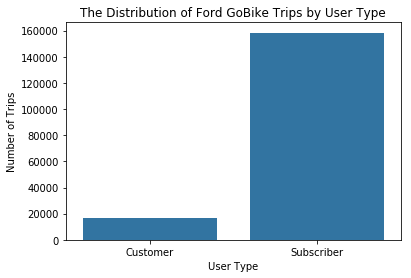

In [31]:
def categoryplot(x, title: str, xlabel: str):
    sns.countplot(data=fordbike_data, x=x, color=sns.color_palette()[0])
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel('Number of Trips')

categoryplot(
    x='user_type',
    title='The Distribution of Ford GoBike Trips by User Type',
    xlabel='User Type');

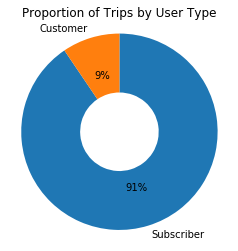

In [32]:
def donutplot(data, title: str):
    plt.pie(
        data,
        labels=data.index,
        startangle=90,
        counterclock=False,
        autopct='%.0f%%',
        wedgeprops={'width':0.6}
    )
    plt.axis('square')
    plt.title(title)

donutplot(
    data=fordbike_data['user_type'].value_counts(),
    title='Proportion of Trips by User Type');

91% of the trips are taken by subscribers. Great!

Now let's see a histogram of the ages

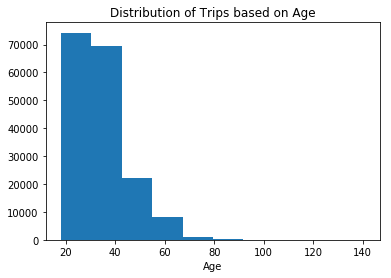

In [33]:
plt.hist(data=fordbike_data, x='age', color=sns.color_palette()[0])
plt.title('Distribution of Trips based on Age')
plt.xlabel('Age');

The histogram is skewed to the right telling us we have more younger users of ford gobike. And I need to focus on the main part with data.

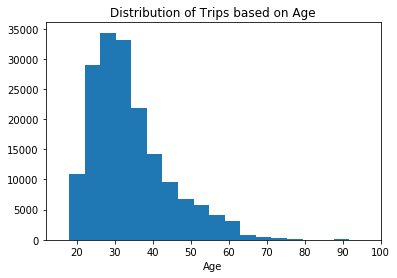

In [34]:
plt.hist(data=fordbike_data, x='age', bins=30, color=sns.color_palette()[0])
plt.title('Distribution of Trips based on Age')
plt.xlabel('Age')
left, right = plt.xlim()
plt.xlim(left, 100);

Then let's use a box plot to visualize age distribution to further solidify our findings.

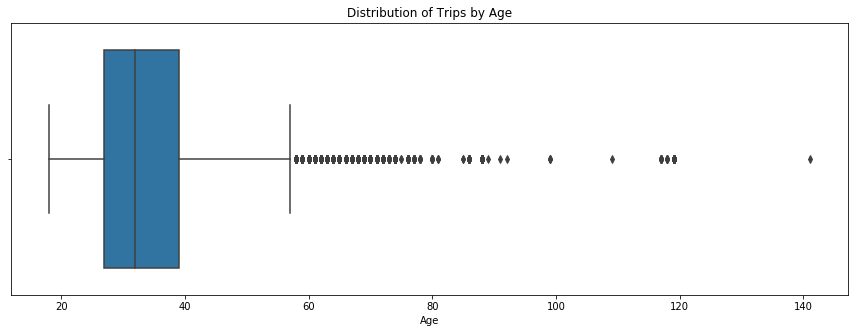

In [35]:
plt.figure(figsize=(15, 5))
sns.boxplot(data=fordbike_data, x='age')
plt.title('Distribution of Trips by Age')
plt.xlabel('Age');

Now there is no debate. There are more younger sets of people in this dataset as the min, max, mean and median fall on the first half of Age axis.

On to the Gender.

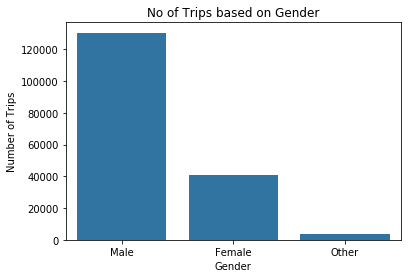

In [36]:
categoryplot(
    x='member_gender',
    title='No of Trips based on Gender',
    xlabel='Gender');

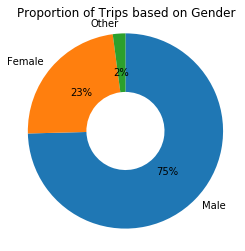

In [37]:
donutplot(
    data=fordbike_data['member_gender'].value_counts(),
    title='Proportion of Trips based on Gender');

This shows that we have more males in our dataset as they cover 75% of the entire population

Let's see the distribution of duration of trips.

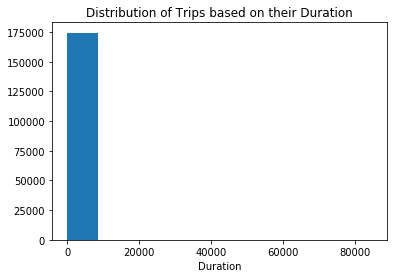

In [38]:
plt.hist(data=fordbike_data, x='duration_sec', color=sns.color_palette()[0])
plt.title('Distribution of Trips based on their Duration')
plt.xlabel('Duration');

The histogram result shows that some outliers are affecting our visualization. So I'll apply logarithmic transformation.

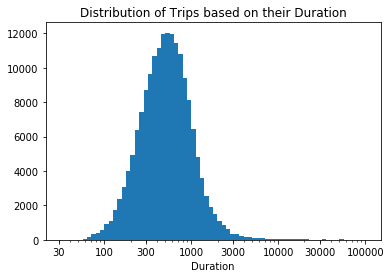

In [39]:
bins = 10 ** np.arange(1.5, 5+0.05, 0.05)
ticks = [30, 100, 300, 1000, 3000, 10000, 30000, 100000]
labels = ['{}'.format(v) for v in ticks]

plt.hist(data=fordbike_data, x='duration_sec', bins=bins, color=sns.color_palette()[0])
plt.title('Distribution of Trips based on their Duration')
plt.xlabel('Duration')
plt.xscale('log')
plt.xticks(ticks, labels);


After apply logarithmic transformation, I can clearly see that most of the trip durations are small.

Next, the number of trips on each weekdays for this dataset.

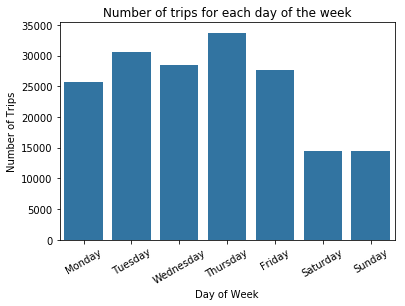

In [40]:
categoryplot(
    x='day',
    title='Number of trips for each day of the week',
    xlabel='Day of Week'
    )
plt.xticks(rotation=30);

I can clearly see from this plot that the most of the trips were taken on Thursday followed by Tuesday. I can also see that weekend trips are not as voluminous as weekday trips.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> After these univariate visualizations, it is clearly shown that more Ford GoBike subsribers are males and most of their trips take place within the week with those trips being short duration trips.
>
> had to apply logarithmic scaling on the x-axis to view the duration distribition clearly. Also plot categorical variables with donutplot to clearly see their proportion

## Bivariate Exploration

Let's start by exploring the trips on each day of week based on user type.

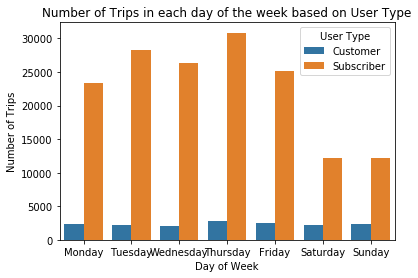

In [41]:
sns.countplot(data=fordbike_data, x='day', hue='user_type')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips',)
plt.title('Number of Trips in each day of the week based on User Type')
plt.legend(title = 'User Type');

I can clearly see the the subscribers go on trips far more than customers and that they do so majorly on week days - monday through friday.

Then explore based on Gender.

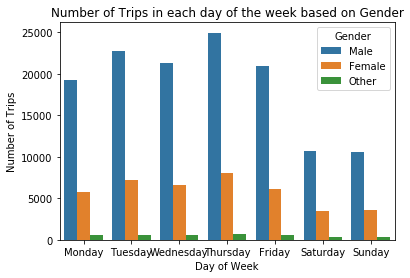

In [42]:
sns.countplot(data=fordbike_data, x='day', hue='member_gender')
plt.xlabel('Day of Week')
plt.ylabel('Number of Trips',)
plt.title('Number of Trips in each day of the week based on Gender')
plt.legend(title = 'Gender');

Quite clear we have more males taking more trips on every day of the week

Then I'll use a box plot to see the distribution of trip duration for each day of the week.

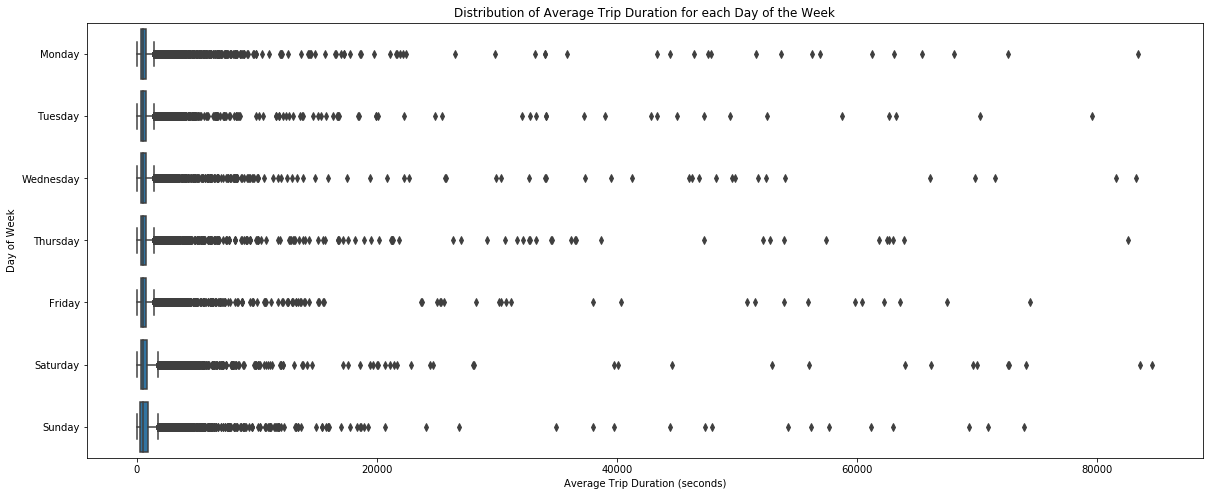

In [43]:
plt.figure(figsize=(20, 8))
sns.boxplot(data=fordbike_data, y='day', x='duration_sec', color=sns.color_palette()[0])
plt.title('Distribution of Average Trip Duration for each Day of the Week')
plt.ylabel('Day of Week')
plt.xlabel('Average Trip Duration (seconds)');

I remembered the use of Logarithmic transformation on duration earlier so I'll be applying it here too

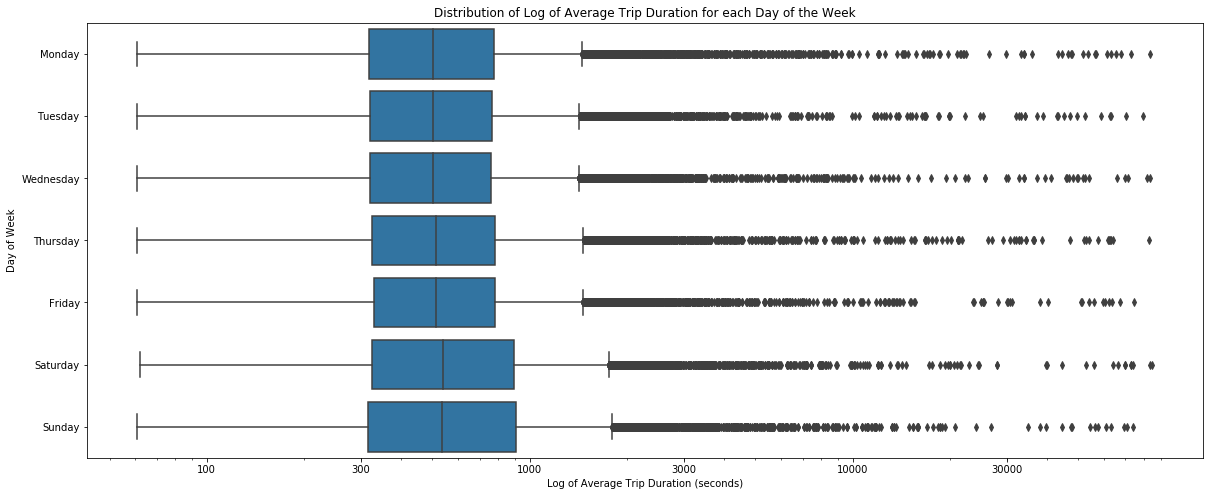

In [44]:
ticks = [100, 300, 1000, 3000, 10000, 30000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(20, 8))
sns.boxplot(data=fordbike_data, y='day', x='duration_sec', color=sns.color_palette()[0])
plt.xscale('log')
plt.title('Distribution of Log of Average Trip Duration for each Day of the Week')
plt.ylabel('Day of Week')
plt.xlabel('Log of Average Trip Duration (seconds)')
plt.xticks(ticks, labels);

We can have longer trip duration on any day of the week as it can be seen with the tails on these plots. But it is quite clear that most of the trips on any day are small duration in nature (even with log transformation) as the mean and median trip duration are on the lower side of the trip duration axis (less than 20000 seconds per each day of the week).

Now let's see how age coontributes to trip duration.

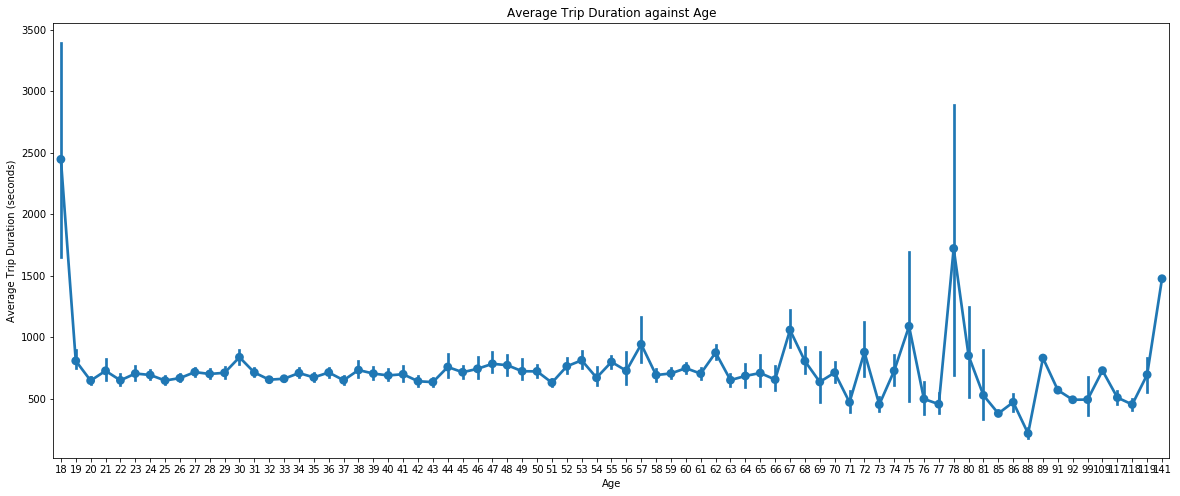

In [45]:
plt.figure(figsize=(20, 8))
sns.pointplot(data=fordbike_data, x='age', y='duration_sec', color=sns.color_palette()[0])
plt.title('Average Trip Duration against Age')
plt.xlabel('Age')
plt.ylabel('Average Trip Duration (seconds)');

Applying Log Transformation on Trip Duration.....

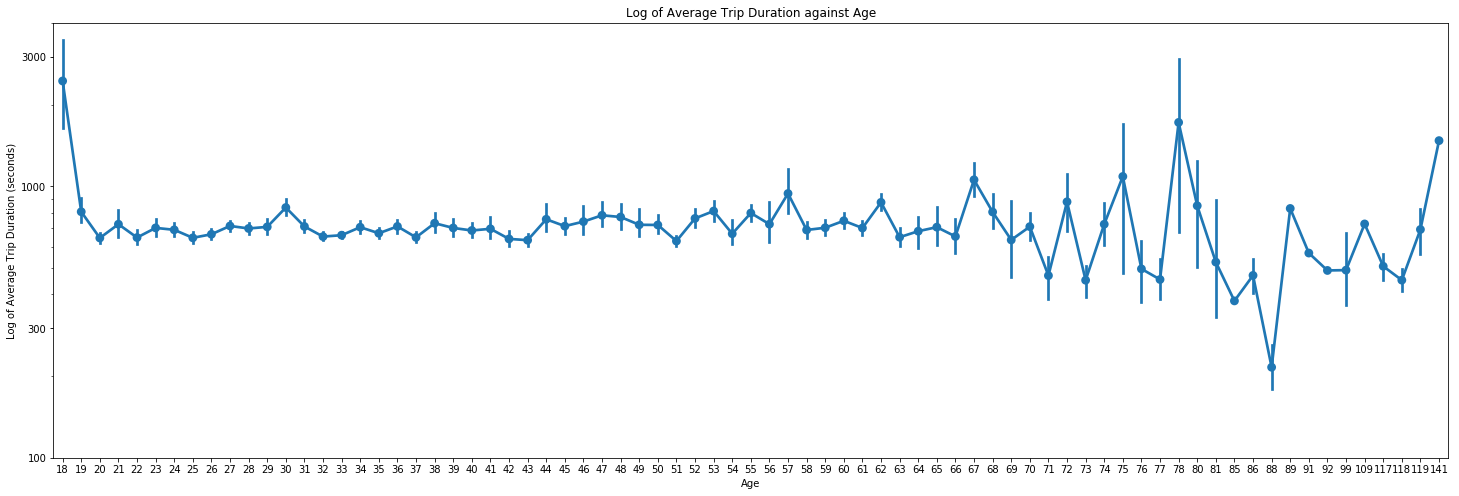

In [46]:
ticks = [100, 300, 1000, 3000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(25, 8))
sns.pointplot(data=fordbike_data, x='age', y='duration_sec', color=sns.color_palette()[0])
plt.yscale('log')
plt.title('Log of Average Trip Duration against Age')
plt.xlabel('Age')
plt.ylabel('Log of Average Trip Duration (seconds)')
plt.yticks(ticks, labels);

People over the age of 60 tend to have erratic trip duration probably because most of them are usually not working 9-5 anymore. The younger ones from the age of 20-60 are in their prime so they spend most of their working in a place and not moving around a lot (it's safe to say they are only moving from home to work and vice versa).

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

It was noted that most trip durations are short and that trip durations that are not regular belonged to old individuals. Another interesting fact is that males generally engage trips than females which happens mostly within the week.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

Bulk of the trips are taken by people within age range 20 to 65.

## Multivariate Exploration

I'll further look into the average trip durations. Which user type spends more time on trips?

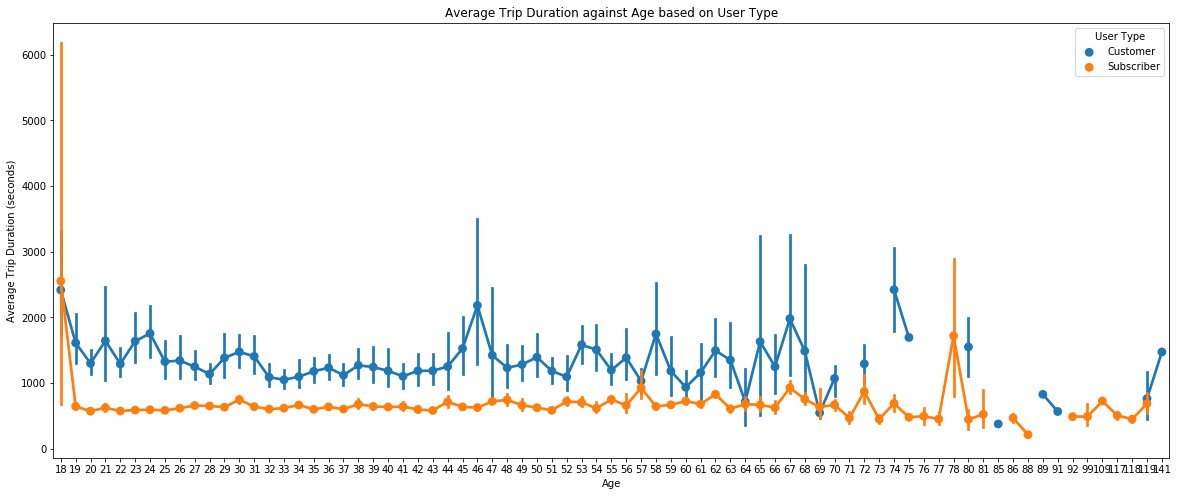

In [47]:
plt.figure(figsize=(20, 8))
sns.pointplot(data=fordbike_data, x='age', y='duration_sec', hue='user_type')
plt.title('Average Trip Duration against Age based on User Type')
plt.xlabel('Age')
plt.ylabel('Average Trip Duration (seconds)');
plt.legend(title='User Type');

Applying log transformation for better view...

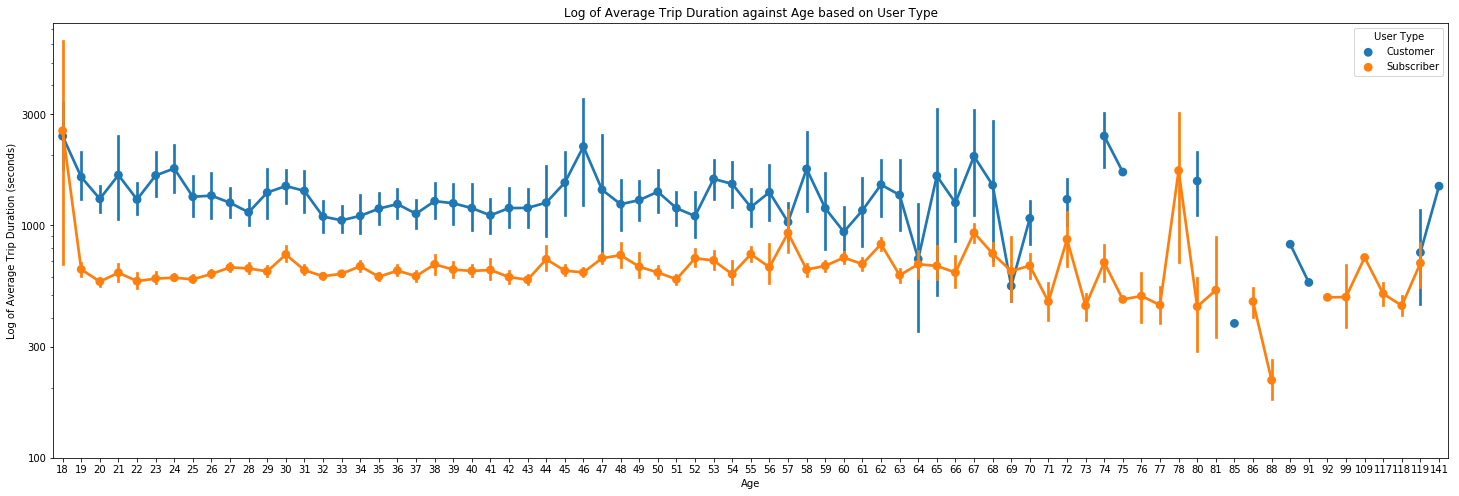

In [48]:
ticks = [100, 300, 1000, 3000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(25, 8))
sns.pointplot(data=fordbike_data, x='age', y='duration_sec', hue='user_type')
plt.yscale('log')
plt.title('Log of Average Trip Duration against Age based on User Type')
plt.xlabel('Age')
plt.ylabel('Log of Average Trip Duration (seconds)')
plt.yticks(ticks, labels)
plt.legend(title='User Type');

I can see from this plot that subsribers don't spend more time on trips as customers. The distribution around each point for subscribers is not as wide as that of customers which is telling me that their trip durations isn't as random as that of the customers.

Now let's look at it from the gender perspective; which gender spends more time on trips?

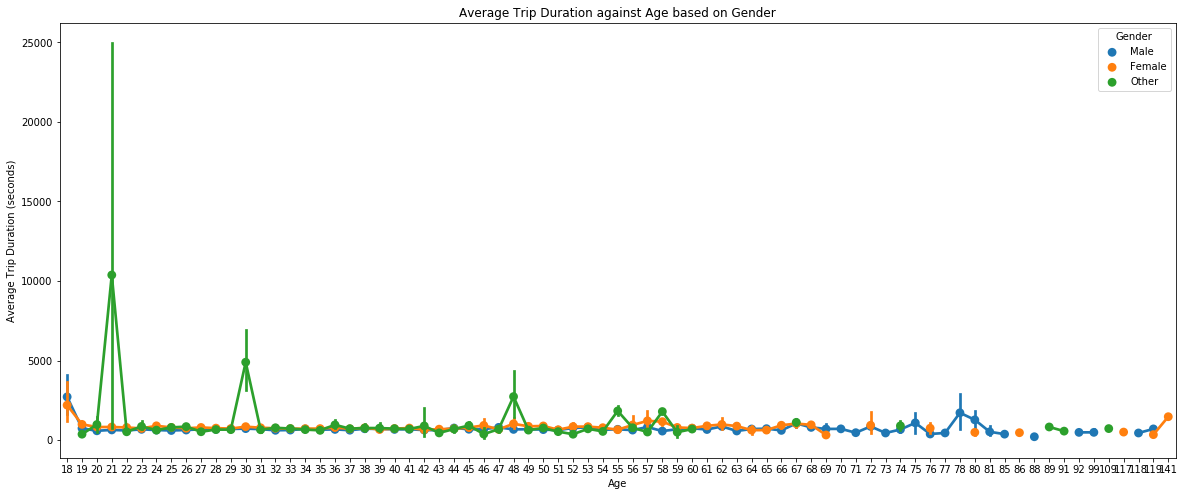

In [49]:
plt.figure(figsize=(20, 8))
sns.pointplot(data=fordbike_data, x='age', y='duration_sec', hue='member_gender')
plt.title('Average Trip Duration against Age based on Gender')
plt.xlabel('Age')
plt.ylabel('Average Trip Duration (seconds)');
plt.legend(title='Gender');

I'll apply log transformation on the Average Trip Duration axis to get a clear view.

In [ ]:
ticks = [100, 300, 1000, 3000]
labels = ['{}'.format(v) for v in ticks]

plt.figure(figsize=(25, 8))
sns.pointplot(data=fordbike_data, x='age', y='duration_sec', hue='member_gender')
plt.yscale('log')
plt.title('Log of Average Trip Duration against Age based on Gender')
plt.xlabel('Age')
plt.ylabel('Log of Average Trip Duration (seconds)')
plt.yticks(ticks, labels)
plt.legend(title='Gender');

Their trip durations are closely interwoven but looking closely at the working class zone(people withing age range 20 to 65) revealed that females generally have a longer trip duration that males.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

The multivariate chart further reeinforces the vast difference between the predictive nature of subscribers and the noticeable erratic nature of the customers and that gender have little effect on trip durations. 

### Were there any interesting or surprising interactions between features?

I was shocked that the trip durations of users over the age of 65 is disconnected (presence of outliers).

## Conclusions
- 91% of trips in this dataset are made by subscribers.
- 75% of trips are made by males.
- Week days are the busiest days of the week as we have more trips than weekends.
- Trips made by people in their prime are generally short duration.
- Subscribers in their prime exhibit predictive trip duration as their average trip duration distribution is compact.